### Flipping a coin in Python

In [1]:
from scipy.stats import bernoulli
bernoulli.rvs(p=0.5, size=1)

array([0])

In [2]:
# 10번 던졌을 때 앞면이 몇 번 나올까???
sum(bernoulli.rvs(p=0.5, size=10))

8

In [3]:
from scipy.stats import binom
# binomial distribution 이용해서 한번에.
binom.rvs(n=10, p=0.5, size=1)

array([6])

In [4]:
# biased coin
binom.rvs(n=10, p=0.3, size=10)

array([2, 2, 3, 2, 1, 6, 4, 3, 2, 5])

#### Random generator seed
1. rvs function에서 random_state parameter을 이용하거나, 
2. numpy.random.seed()함수를 이용한다. 
    - 예) np.random.seed(42)

In [5]:
import numpy as np
np.random.seed(42)
binom.rvs(n=10, p=0.3, size = 10)

array([2, 5, 4, 3, 2, 2, 1, 5, 3, 4])

## Probability mass and distribution functions

### **PMF** and **PDF**

### 1. PMF
Random Variable이 특정한 값을 가질 확률

In [6]:
# binom.pmf(k, n, p)
# Probability of 2 heads after 10 throws with a fair coin
binom.pmf(k=2, n=10, p=0.5)

0.043945312499999993

In [7]:
# Probability of 5 heads after 10 throws with a fair coin
binom.pmf(k=5, n=10, p=0.5)

0.24609375000000025

In [8]:
# Probability of 50 heads after 100 throws with p=0.3
binom.pmf(k=50, n=100, p=0.3)

1.3026227131445298e-05

In [9]:
# Probability of 65 heads after 100 throws with p=0.7
binom.pmf(k=65, n=100, p=0.7)

0.0467796823527298

In [33]:
# 배열을 넣어도 된다.
# Probability of getting 0, 1, or 2 from the distribution
probabilities = binom.pmf([0, 1, 2], n=2, p=.5)
print(probabilities)

[ 0.25  0.5   0.25]


### 2. CDF
Random Variable이 특정한 값 이하의 값을 가질 확률

In [10]:
# binom.cdf(k, n, p)
binom.cdf(k=1, n=3, p=0.5)

0.5

In [11]:
# Probability of 5 heads or less after 10 throws with a fair coin
binom.cdf(k=5, n=10, p=0.5)

0.62304687499999989

In [12]:
# Probability of 50 heads or less after 100 throws with p=0.3
binom.cdf(k=50, n=100, p=0.3)

0.99999096531380427

In [13]:
# Probability of More than 59 heads after 100 throws with p=0.7
1 - binom.cdf(k=59, n=100, p=0.7)

0.98750159283356176

In [16]:
# 혹은 binom.sf(k, n, p)로 complement 계산 가능.
# sf: srvival function. tail부분 계산해줌..
binom.sf(k=59, n=100, p=0.7)

0.98750159283356176

### Expected value, mean, and variance

scipy.stats.describe() for get the Arithmetic mean and other stats.

In [17]:
from scipy.stats import describe
describe([0, 1])

DescribeResult(nobs=2, minmax=(0, 1), mean=0.5, variance=0.5, skewness=0.0, kurtosis=-2.0)

In [18]:
describe([0, 1]).mean

0.5

시행 수가 많아질수록 Sample mean은 Expected Value에 수렴한다. **Law of Large Numbers**

### Variance: a measure of dispersion

In [19]:
describe([0, 1]).variance

0.5

For X ~ Binomial(n, p)  
E(X) = n x p  
Var(X) = n x p x (1 - p)  

binom.stats() method to get the expected value and variance

In [20]:
binom.stats(n=10, p=0.5)

(array(5.0), array(2.5))

In [21]:
# expected value and variance for one biased coin flip, with 30% probability of success
binom.stats(n=1, p=.3)

(array(0.3), array(0.21))

### Calculating probabilities of two events

In [22]:
# Generate a sample that represents 1000 throws of two fair coin flips
sample = binom.rvs(n=2, p=0.5, size=1000, random_state=1)

In [23]:
sample

array([1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 2, 0, 1, 1, 1, 0, 0, 2, 2, 1,
       1, 2, 2, 0, 0, 0, 2, 0, 1, 2, 1, 1, 1, 1, 2, 0, 2, 2, 1, 1, 2, 0, 1,
       2, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 2,
       1, 2, 0, 0, 2, 1, 0, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 0, 2,
       1, 1, 1, 0, 2, 1, 0, 1, 1, 1, 2, 1, 2, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0,
       2, 2, 2, 1, 0, 0, 0, 0, 0, 2, 1, 1, 2, 0, 1, 1, 2, 1, 0, 2, 0, 2, 1,
       2, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0, 1, 2, 2, 0,
       1, 1, 2, 0, 0, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 2, 0,
       1, 2, 0, 1, 1, 2, 1, 0, 1, 2, 2, 2, 0, 0, 1, 2, 2, 1, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 2, 0, 0, 0, 1, 0, 2, 2, 0, 0, 1, 0, 2, 1, 2, 1, 2, 2, 2,
       1, 1, 2, 1, 1, 1, 0, 1, 1, 2, 1, 2, 1, 0, 2, 1, 0, 1, 1, 2, 0, 2, 1,
       2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       0, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 0, 1, 0, 2,
       0, 2,

In [31]:
from scipy.stats import find_repeats
find_repeats(sample)

RepeatedResults(values=array([ 0.,  1.,  2.]), counts=array([249, 497, 254], dtype=int64))

In [32]:
find_repeats(sample).counts[2]

254

#### Measuring a biased sample

Using `biased_sample` data generated, calculate the relative frequency of each outcomes

In [27]:
from scipy.stats import relfreq
biased_sample = binom.rvs(n=2, p=0.8, size=1000, random_state=1)
relfreq(biased_sample, numbins=3).frequency

array([ 0.039,  0.317,  0.644])

각각 TT, HT, HH의 확률. numbins = 3 for the three possible outcomes  

## Conditional probabilities

#### Contingency table
모든 경우의 수를 다 적어놓은 표. 

The following table shows the numbers of red and black cards in a deck that are Aces and non-Aces:  
  
            Red   Black  Total
    Ace       2     2       4
    Non Ace  24    24      48
    Total    26    26      52

## Total probability law

#### Formula 1 engines
Suppose that two manufacturers, A and B, supply the engines for Formula 1 racing cars, with the following characteristics:  
  
- 99% of the engines from factory A last more than 5,000 km.
- Factory B manufactures engines that last more than 5,000 km with 95% probability.
- 70% of the engines are from manufacturer A, and the rest are produced by manufacturer B.
  
What is the chance that an engine will last more than 5,000 km?

#### Calculate the following probabilities: P_A, P_B, P_last5000_g_A, and P_last5000_g_B

In [ ]:
# Needed probabilities
P_A = .7
P_last5000_g_A = .99
P_B = .3
P_last5000_g_B = .95

# Total probability calculation
P_last_5000 = P_A * P_last5000_g_A + P_B * P_last5000_g_B

print(P_last_5000)

## Bayes' rule

#### Factories and parts example
A certain electronic part is manufactured by three different vendors, V1, V2, and V3.  
Half of the parts are produced by V1, and V2 and V3 each produce 25%.  
The probability of a part being damaged given that it was produced by V1 is 1%, while it's 2% for V2 and 3% for V3.  
- Given that the part is damaged, what is the probability that it was manufactured by V1?

In [34]:
P_V1 = 0.5
P_V2 = 0.25
P_V3 = 0.25

P_D_g_V1 = 0.01
P_D_g_V2 = 0.02
P_D_g_V3 = 0.03

P_Damaged = P_V1 * P_D_g_V1 + P_V2 * P_D_g_V2 + P_V3 * P_D_g_V3

P_V1_g_D = (P_V1 * P_D_g_V1) / P_Damaged # P(V1|D) calculation
print(P_V1_g_D)

0.2857142857142857


## Normal distributions

In [35]:
# Import norm, matplotlib.pyplot, and seaborn
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
# Create the sample using norm.rvs()
sample = norm.rvs(loc = 0, scale = 1, size = 10000, random_state = 13)

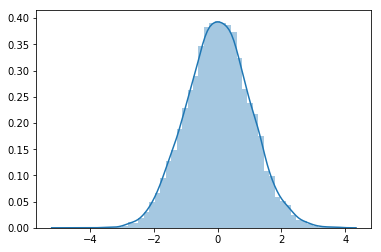

In [37]:
# Plot the sample
sns.distplot(sample)
plt.show()

In [38]:
# Calculate the probability density with pdf
norm.pdf(-1, loc=0, scale=1)   # loc: mean, scale: standard deviation

0.24197072451914337

In [39]:
# Calculate CDF
norm.cdf(-1)    # loc, scale default 값은 표준정규분포.

0.15865525393145707

### The Percent point function (PPF)

In [40]:
norm.ppf(0.2)    # 표준 정규분포에서 cdf가 0.2인 곳의 값.

-0.84162123357291418

In [41]:
norm.ppf(0.5)

0.0

ppf와 cdf는 역함수 관계.

#### Adults' heights example
The heights of adults aged between 18 and 35 years are normally distributed. For males,  
the mean height is 70 inches with a standard deviation of 4.  
Adult females have a mean height of 65 inches with a standard deviation of 3.5.  
You can see how the heights are distributed in this plot:  
  
<img src="https://assets.datacamp.com/production/repositories/3819/datasets/f87c00739d12771e61e77a2cc97449c98f106afd/male-females.png" width="300">  
Adults heights distribution for male and female  
   
Using the previous information, complete the following exercises.  
  
For your convenience, norm has been imported from the library scipy.stats.  

In [42]:
# 1. Print the range of female heights one standard deviation from the mean.

# Values one standard deviation from mean height for females
interval = norm.interval(0.68, loc=65, scale=3.5)
print(interval)

(61.519397408765862, 68.480602591234131)


In [43]:
# 2. Print the value where the tallest males fall with 0.01 probability.

# Value where the tallest males fall with 0.01 probability
tallest = norm.ppf(0.99, loc=70, scale=4)
print(tallest)

79.3053914962


In [44]:
# 3. Print the probability of being taller than 73 inches for a male and for a female.

# Probability of being taller than 73 inches for males and females
P_taller_male = norm.sf(73, loc=70, scale=4)
P_taller_female = norm.sf(73, loc=65, scale=3.5)
print(P_taller_male, P_taller_female)

0.226627352377 0.0111354894796


In [45]:
# 4. Print the probability of being shorter than 61 inches for a male and for a female.

# Probability of being shorter than 61 inches for males and females
P_shorter_male = norm.cdf(61, loc=70, scale=4)
P_shorter_female = norm.cdf(61, loc=65, scale=3.5)
print(P_shorter_male, P_shorter_female)

0.012224472655 0.126548954474


## Poisson distributions

어떤 시간간격 동안 사건이 발생할 확률이 고정돼있을 때.  
예를 들어 콜센터에 1분당 전화가 2.2회 온다고 할 때 3번의 전화가 올 확률은?  ...

In [46]:
from scipy.stats import poisson

In [47]:
poisson.pmf(k=3, mu=2.2)

0.19663867170702193

In [48]:
# Create the sample using poisson.rvs()
sample = poisson.rvs(mu=2.2, size=10000, random_state=13)

In [49]:
sample

array([5, 4, 1, ..., 3, 1, 2])

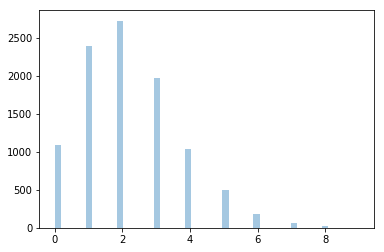

In [50]:
sns.distplot(sample, kde=False)
plt.show()

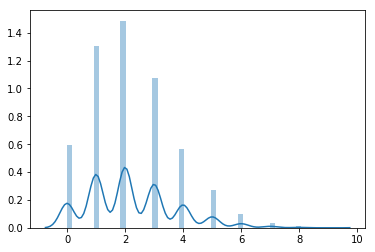

In [51]:
sns.distplot(sample, kde=True)
plt.show()

#### Highway accidents example
On a certain turn on a very busy highway, there are 2 accidents per day.  
Let's assume the number of accidents per day can be modeled as a Poisson random variable and is distributed as in the following plot:  
<img src="https://assets.datacamp.com/production/repositories/3819/datasets/1a4cb33d15fdc97987a153fbaae96485107ae00b/accidents.png" width="400">  
  
For your convenience, the poisson object has already been imported from the scipy.stats library.  
Aiming to improve road safety, the transportation agency of the regional government has assigned you the following tasks.  

#### 1. Determine and print the probability of there being 5 accidents on any day.

In [52]:
# Import the poisson object
from scipy.stats import poisson

# Probability of 5 accidents any day
P_five_accidents = poisson.pmf(k=5, mu=2)

# Print the result
print(P_five_accidents)

0.0360894088631


#### 2. Determine and print the probability of having more than 3 and less than 6 accidents on any day.

In [53]:
# Import the poisson object
from scipy.stats import poisson

# Probability of more than 3 and less than 6 accidents any day
P_less_than_6 = poisson.cdf(k=5, mu=2)
P_less_than_3 = poisson.cdf(k=3, mu=2)

# Print the result
print(P_less_than_6 - P_less_than_3)

0.126312931021


#### 3. Determine and print the probability of having more than 3 accidents on any day.

In [54]:
# Import the poisson object
from scipy.stats import poisson

# Probability of more than 3 accidents any day
P_more_than_3 = poisson.sf(k=3, mu=2)

# Print the result
print(P_more_than_3)

0.142876539501


#### 4. Determine and print the number of accidents that is likely to happen with 0.75 probability.

In [55]:
# Import the poisson object
from scipy.stats import poisson

# Number of accidents with 0.75 probability
accidents = poisson.ppf(q=0.75, mu=2)

# Print the result
print(accidents)

3.0


### Generating and plotting Poisson distributions
In the previous exercise, you calculated some probabilities. Now let's plot that distribution.   
  
Recall that on a certain highway turn, there are 2 accidents per day on average.  
Assuming the number of accidents per day can be modeled as a Poisson random variable, let's plot the distribution.  

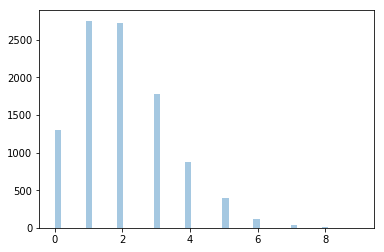

In [56]:
# Import poisson, matplotlib.pyplot, and seaborn
from scipy.stats import poisson
import matplotlib.pyplot as plt 
import seaborn as sns

# Create the sample
sample = poisson.rvs(mu=2, size=10000, random_state=13)

# Plot the sample
sns.distplot(sample, kde=False)
plt.show()

## Geometric distributions
With a geometric distribution we model a series of failed outcomes until we obtain a successful one.  
성공률이 p일 때, k번 시도만에 성공할 확률!

In [57]:
from scipy.stats import geom

In [59]:
geom.pmf(k=30, p=0.0333)

0.012471080216374412

In [61]:
geom.cdf(k=4, p=0.3)

0.75990000000000002

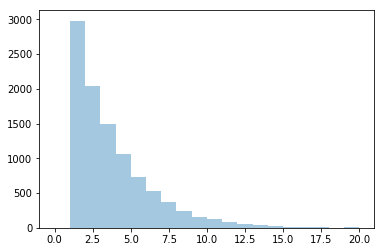

In [62]:
import numpy as np
sample = geom.rvs(p=0.3, size=10000, random_state=13)
sns.distplot(sample, bins = np.linspace(0, 20, 21), kde=False)
plt.show()

## From sample mean to population mean

In [64]:
from scipy.stats import binom
from scipy.stats import describe

samples = binom.rvs(n=1, p=0.5, size=250, random_state=42)

print(samples[0:100])

[0 1 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 1 0 0 1 1 1 0
 0 1 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 1
 1 1 1 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0 1 0 0 0]


In [65]:
# Calculate the sample mean
print(describe(samples[0:10]).mean)

0.6


In [66]:
import matplotlib.pyplot as plt

# Define our variables
coin_flips, p, sample_size, averages = 1, 0.5, 1000, []

# Generate the sample
samples = binom.rvs(n=coin_flips, p=p, size=sample_size, random_state=42)

In [67]:
# Calculate the sample mean
for i in range(2, sample_size+1):
    averages.append(describe(sample[0:i]).mean)
    
# Print the first values of averages 
print(averages[0:10])

[0.5, 0.66666666666666663, 0.75, 0.59999999999999998, 0.5, 0.42857142857142855, 0.5, 0.55555555555555558, 0.59999999999999998, 0.54545454545454541]


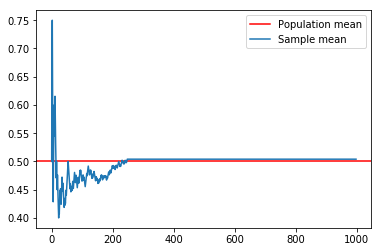

In [68]:
# Add population mean line and sample mean plot
plt.axhline(binom.mean(n=coin_flips, p=p), color='red')
plt.plot(averages, '-')

# Add legend
plt.legend(("Population mean", "Sample mean"), loc='upper right')
plt.show()

## Adding random variables

중심 극한 정리가 가장 중요!  

### The Central Limit Theorem(CLT)
> The sum of random variables tends to a normal distribution as the number of them grows to infinity.  
  
Conditions:  
- The variables must have the same distribution.
- The variables must be independent.

### Poisson population plot

In [69]:
# Add the imports
from scipy.stats import poisson, describe
import matplotlib.pyplot as plt
import numpy as np

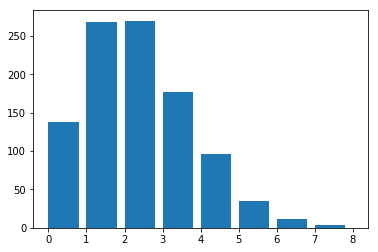

In [70]:
# Generate the population
population = poisson.rvs(mu=2, size=1000, random_state=20)

# Draw the histogram with labels
plt.hist(population, bins=range(9), width=0.8)
plt.show()

### Poisson Sample means plot

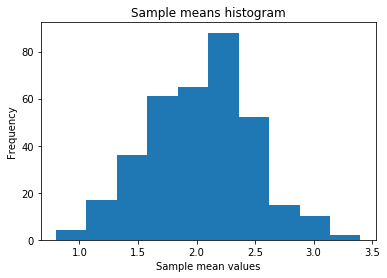

In [71]:
# Generate 350 sample means, selecting from population values
np.random.seed(42)

# Defind list of sample means
sample_means = []
for _ in range(350):
    # Select 10 from population
    sample = np.random.choice(population, 10)
    # Calculate sample mean of sample
    sample_means.append(describe(sample).mean)
    
# Draw histogram with labels
plt.xlabel("Sample mean values")
plt.ylabel("Frequency")
plt.title("Sample means histogram")
plt.hist(sample_means)
plt.show()